### 파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋

** 데이터 세트 로딩 **

In [2]:
import xgboost

print(xgboost.__version__)

0.90


In [3]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset= load_breast_cancer()
X_features= dataset.data
y_label = dataset.target
cancer_df= pd.DataFrame(data=X_features,columns= dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,
                                              test_size=0.2,random_state=156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [ ]:
## XGboost를 사용하기 위해서는 DMatrix에 넣어야 사용할 수 있따.

In [12]:
dtrain =xgb.DMatrix(data=X_train,label=y_train)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [13]:
params={
    'max_dept':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds=400

In [14]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )
# num_boost_round 몇번 반복할 것인지, 

[0]	train-logloss:0.607926	eval-logloss:0.613373
[1]	train-logloss:0.537708	eval-logloss:0.548582
[2]	train-logloss:0.478719	eval-logloss:0.49512
[3]	train-logloss:0.428721	eval-logloss:0.449858
[4]	train-logloss:0.38476	eval-logloss:0.411162
[5]	train-logloss:0.346051	eval-logloss:0.376142
[6]	train-logloss:0.311837	eval-logloss:0.348044
[7]	train-logloss:0.282218	eval-logloss:0.322942
[8]	train-logloss:0.256209	eval-logloss:0.3
[9]	train-logloss:0.233252	eval-logloss:0.280711
[10]	train-logloss:0.213087	eval-logloss:0.26271
[11]	train-logloss:0.195704	eval-logloss:0.247963
[12]	train-logloss:0.179624	eval-logloss:0.234006
[13]	train-logloss:0.16533	eval-logloss:0.222582
[14]	train-logloss:0.152227	eval-logloss:0.211374
[15]	train-logloss:0.140814	eval-logloss:0.202966
[16]	train-logloss:0.129869	eval-logloss:0.195836
[17]	train-logloss:0.120285	eval-logloss:0.188169
[18]	train-logloss:0.111705	eval-logloss:0.180831
[19]	train-logloss:0.103616	eval-logloss:0.173958
[20]	train-logloss:

[164]	train-logloss:0.006796	eval-logloss:0.111512
[165]	train-logloss:0.006777	eval-logloss:0.111562
[166]	train-logloss:0.006757	eval-logloss:0.111622
[167]	train-logloss:0.006738	eval-logloss:0.111393
[168]	train-logloss:0.00672	eval-logloss:0.111359
[169]	train-logloss:0.006702	eval-logloss:0.111261
[170]	train-logloss:0.006683	eval-logloss:0.111311
[171]	train-logloss:0.006665	eval-logloss:0.111014
[172]	train-logloss:0.006647	eval-logloss:0.110769
[173]	train-logloss:0.006629	eval-logloss:0.110684
[174]	train-logloss:0.006611	eval-logloss:0.110711
[175]	train-logloss:0.006593	eval-logloss:0.110781
[176]	train-logloss:0.006575	eval-logloss:0.110833
[177]	train-logloss:0.006558	eval-logloss:0.110741
[178]	train-logloss:0.00654	eval-logloss:0.110453
[179]	train-logloss:0.006523	eval-logloss:0.110718
[180]	train-logloss:0.006506	eval-logloss:0.11078
[181]	train-logloss:0.006489	eval-logloss:0.11054
[182]	train-logloss:0.006473	eval-logloss:0.110466
[183]	train-logloss:0.006456	eval-l

[326]	train-logloss:0.005113	eval-logloss:0.108767
[327]	train-logloss:0.005108	eval-logloss:0.108809
[328]	train-logloss:0.005103	eval-logloss:0.108679
[329]	train-logloss:0.005098	eval-logloss:0.108741
[330]	train-logloss:0.005093	eval-logloss:0.108763
[331]	train-logloss:0.005088	eval-logloss:0.108805
[332]	train-logloss:0.005083	eval-logloss:0.108726
[333]	train-logloss:0.005078	eval-logloss:0.108778
[334]	train-logloss:0.005073	eval-logloss:0.108653
[335]	train-logloss:0.005068	eval-logloss:0.108644
[336]	train-logloss:0.005063	eval-logloss:0.108703
[337]	train-logloss:0.005058	eval-logloss:0.108726
[338]	train-logloss:0.005053	eval-logloss:0.108603
[339]	train-logloss:0.005049	eval-logloss:0.1085
[340]	train-logloss:0.005044	eval-logloss:0.108491
[341]	train-logloss:0.005039	eval-logloss:0.108413
[342]	train-logloss:0.005034	eval-logloss:0.108472
[343]	train-logloss:0.00503	eval-logloss:0.108522
[344]	train-logloss:0.005025	eval-logloss:0.108401
[345]	train-logloss:0.005021	eval-

In [16]:
pred_probs=xgb_model.predict(dtest)
print(pred_probs[:10])

[8.63432348e-01 4.42733942e-03 9.41623330e-01 8.63184184e-02
 9.93404210e-01 9.99975085e-01 9.99777257e-01 9.99563992e-01
 9.96520400e-01 1.19112374e-04]


In [20]:
preds = [1 if x>0.5 else 0 for x in pred_probs]
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9926


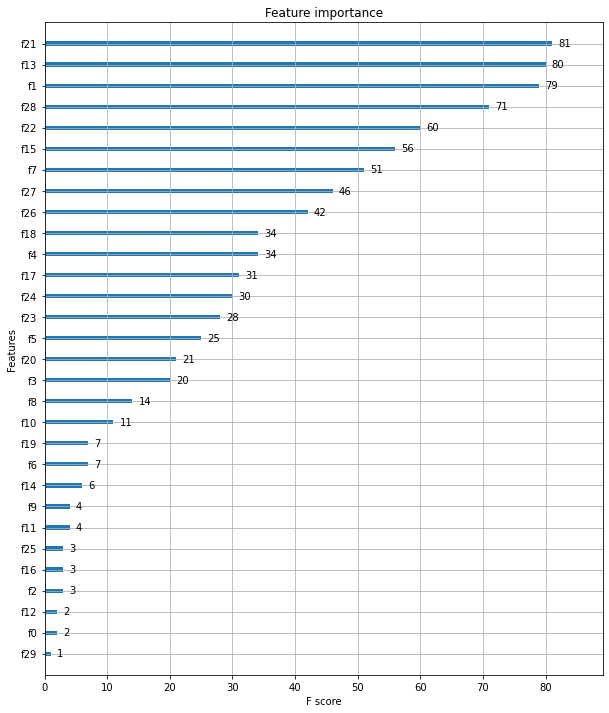

In [25]:
# 중요도 순으로 위에서부터 나열 
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax) # xgboost 내장 함수

In [33]:
from xgboost import XGBClassifier
evals= [(X_test,y_test)]
xgb_wrapper= XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400,eval_set=evals
                ,eval_metric='logloss',verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [34]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [35]:
from xgboost import XGBClassifier
xgb_wrapper= XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)

evals= [(X_test,y_test)]

xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_set=evals
                ,eval_metric='logloss',verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [36]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [37]:
from xgboost import XGBClassifier
xgb_wrapper= XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)

evals= [(X_test,y_test)]

xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10,eval_set=evals
                ,eval_metric='logloss',verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


In [38]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9947


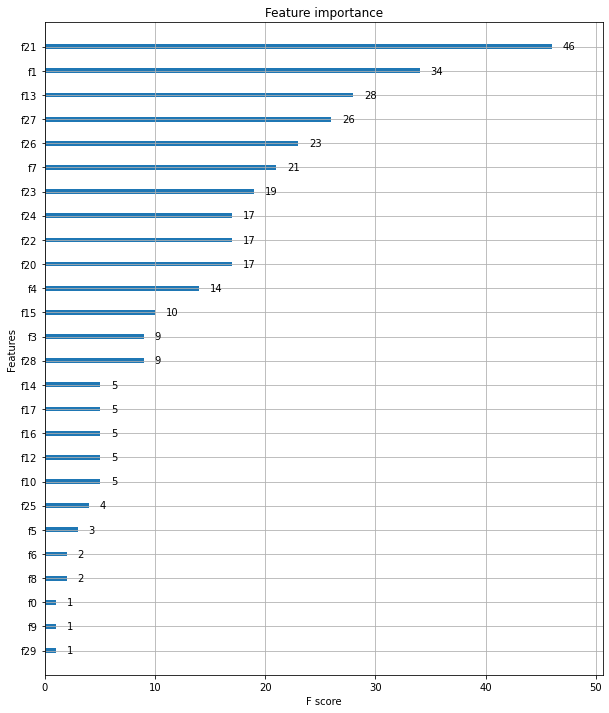

In [39]:
# 중요도 순으로 위에서부터 나열 
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax) # xgboost 내장 함수

In [40]:
import lightgbm

print(lightgbm.__version__)

3.0.0


In [42]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, 
                                                  test_size=0.2, random_state=156 )

lgbm_wrapper=LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)] # 원래는 검증 데이터셋이기 때문에 새로운 것을 써야함
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_pro=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test , preds, pred_pro)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


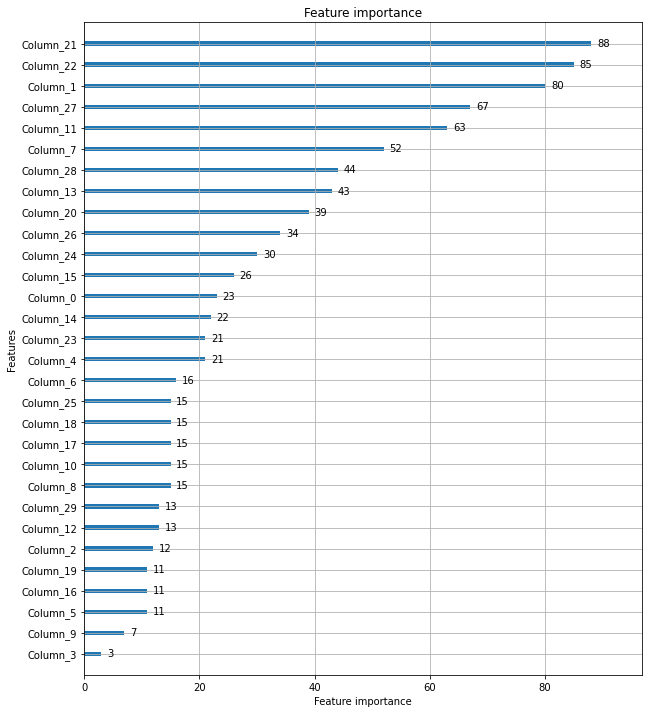

In [45]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 컬럼의 명은 알수가 없다.
plot_importance(lgbm_wrapper, ax=ax)